# Import and Upload

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# upload
uploaded = files.upload()

Saving Santiago_gdp_yearly_agg.csv to Santiago_gdp_yearly_agg.csv


# Normalized Chile GDP - monthly

In [ ]:
df_gdp = pd.read_csv('gdp_norm_monthly_agg.csv')
df_gdp.head()

,EXTRACTIONDATE,OBSERVATION_DATE,GDP_NORMALIZED,YEAR,MONTH,LIKELIHOODOFDEFAULT
0,2024-03-31,2006-01-01,100.776983,2006,1,0.019363
1,2024-03-31,2006-02-01,100.804387,2006,2,0.017998
2,2024-03-31,2006-03-01,100.858167,2006,3,0.036930
3,2024-03-31,2006-04-01,100.934271,2006,4,0.036691
4,2024-03-31,2006-05-01,101.023159,2006,5,0.026561


In [ ]:
# check if there is missing value
is_na_present = df_gdp.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [ ]:
df_gdp.dtypes

EXTRACTIONDATE          object
OBSERVATION_DATE        object
GDP_NORMALIZED         float64
YEAR                     int64
MONTH                    int64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [ ]:
# pick only Normalized GDP and Default Likelihood
df_gdp_corr = df_gdp[['GDP_NORMALIZED', 'LIKELIHOODOFDEFAULT']]
df_gdp_corr.head()

,GDP_NORMALIZED,LIKELIHOODOFDEFAULT
0,100.776983,0.019363
1,100.804387,0.017998
2,100.858167,0.036930
3,100.934271,0.036691
4,101.023159,0.026561


Basic Visualization

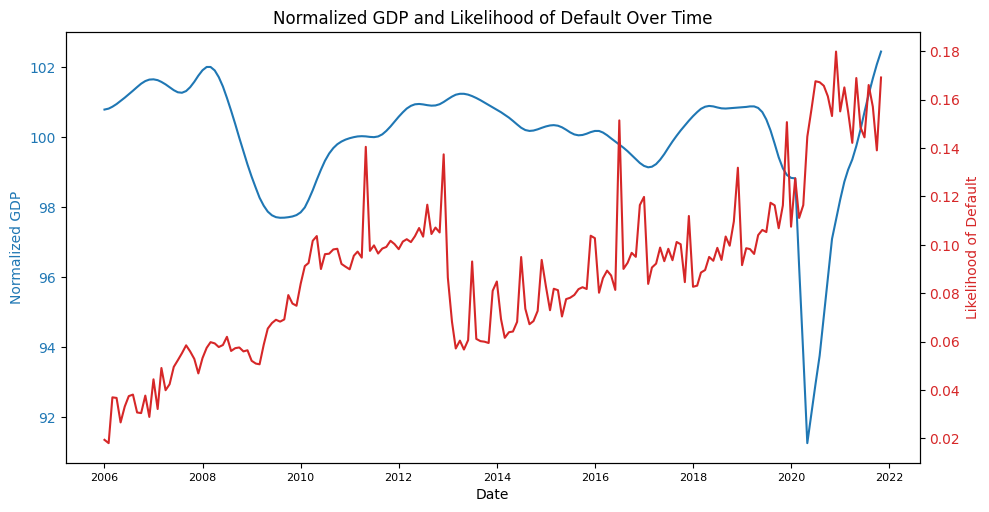

In [ ]:
# Normalized GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_gdp['OBSERVATION_DATE'] = pd.to_datetime(df_gdp['OBSERVATION_DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized GDP', color=color)
ax1.plot(df_gdp['OBSERVATION_DATE'], df_gdp['GDP_NORMALIZED'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_gdp['OBSERVATION_DATE'], df_gdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Normalized GDP and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_gdp_corr['GDP_NORMALIZED'], df_gdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_gdp_corr['GDP_NORMALIZED']
X = sm.add_constant(X)  # adding a constant to the model
y = df_gdp_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
gdp_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(gdp_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.200
Model:                             OLS   Adj. R-squared:                  0.196
Method:                  Least Squares   F-statistic:                     47.32
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):           8.57e-11
Time:                         23:35:41   Log-Likelihood:                 397.62
No. Observations:                  191   AIC:                            -791.2
Df Residuals:                      189   BIC:                            -784.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9843      0.1

In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(gdp_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {gdp_model.params[0]:.3f}")
print(f"Slope (Normalized GDP): {gdp_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {gdp_model.pvalues[0]:.3f}")
print(f"P-value (Normalized GDP): {gdp_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {gdp_model.bse[0]:.3f}")
print(f"Standard Error (Normalized GDP): {gdp_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: -0.44748691572054256
Model R-squared: 0.200

Model Coefficients:
Intercept: 0.984
Slope (Normalized GDP): -0.009

Model P-values:
P-value (Intercept): 0.000
P-value (Normalized GDP): 0.000

Model Standard Errors:
Standard Error (Intercept): 0.130
Standard Error (Normalized GDP): 0.001


Regression Visualization

In [ ]:
sns.set_style("whitegrid")

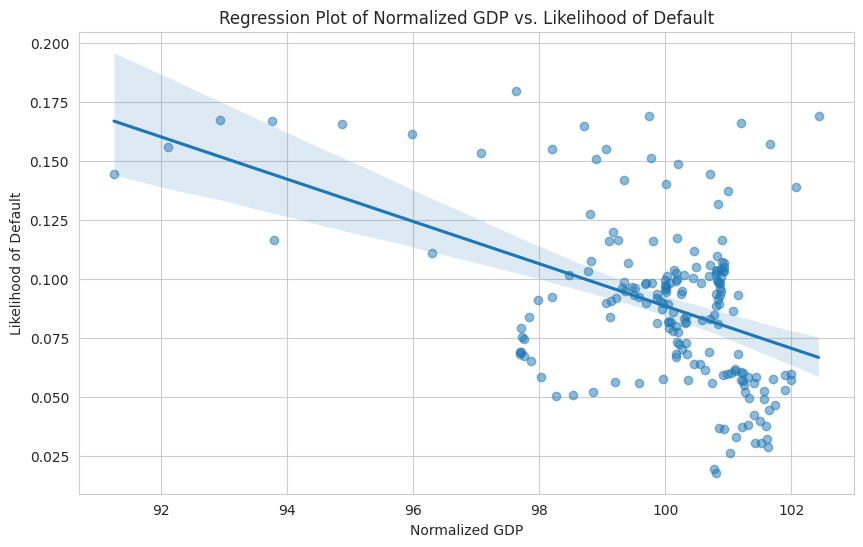

In [ ]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP_NORMALIZED', y='LIKELIHOODOFDEFAULT', data=df_gdp_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Normalized GDP vs. Likelihood of Default')
plt.xlabel('Normalized GDP')
plt.ylabel('Likelihood of Default')
plt.show()

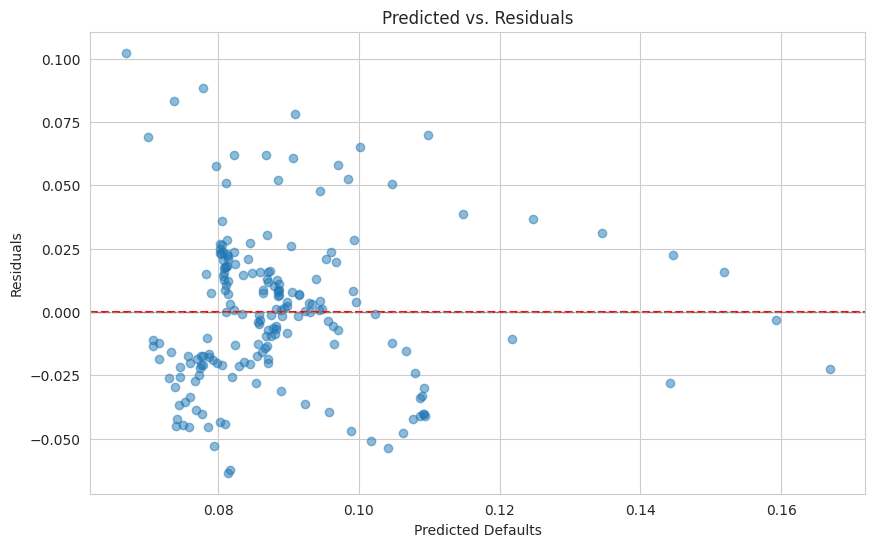

In [ ]:
# Residual Plot
residuals = gdp_model.resid
predicted = gdp_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 2000x600 with 0 Axes>

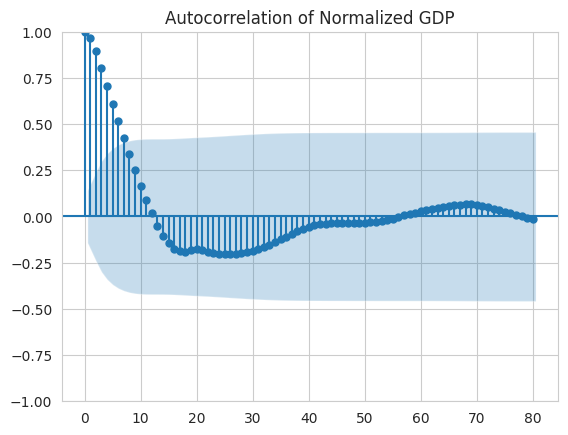

<Figure size 2000x600 with 0 Axes>

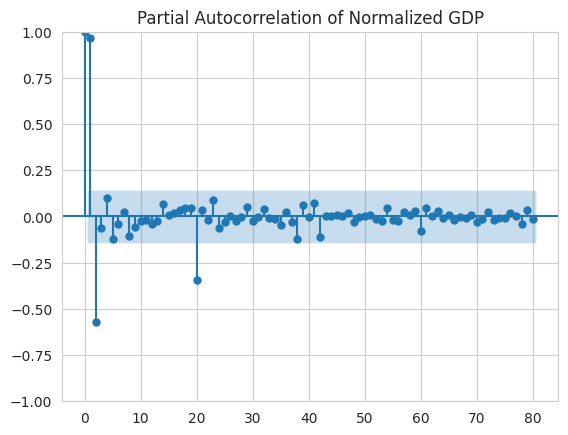

In [ ]:
# Autocorrelation and Partial Autocorrelation
df_gdp.set_index('OBSERVATION_DATE', inplace=True)

# Autocorrelation Plot for Normalized GDP
plt.figure(figsize=(20, 6))
plot_acf(df_gdp['GDP_NORMALIZED'], lags=80)
plt.title('Autocorrelation of Normalized GDP')
plt.show()

# Partial Autocorrelation Plot for Normalized GDP
plt.figure(figsize=(20, 6))
plot_pacf(df_gdp['GDP_NORMALIZED'], lags=80, method='ywm')
plt.title('Partial Autocorrelation of Normalized GDP')
plt.show()

<Figure size 2000x600 with 0 Axes>

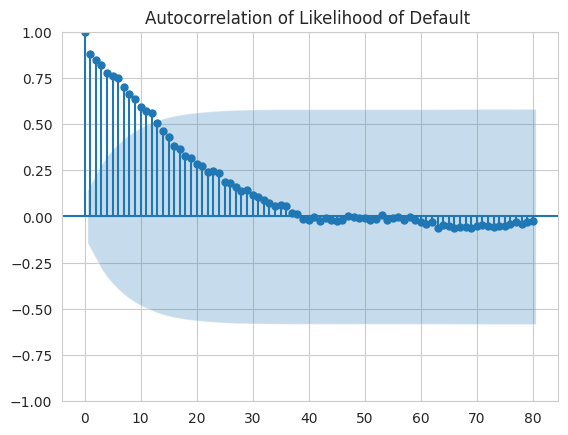

<Figure size 2000x600 with 0 Axes>

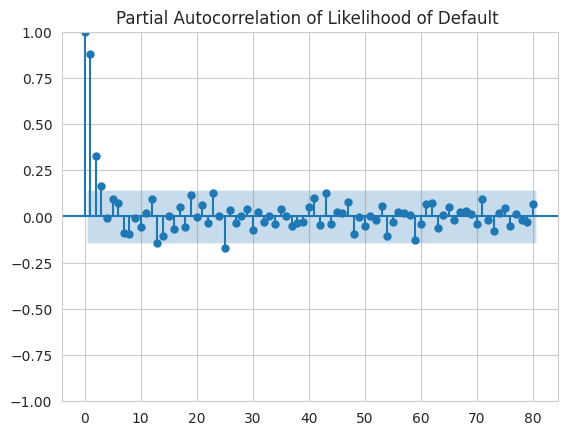

In [ ]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_acf(df_gdp['LIKELIHOODOFDEFAULT'], lags=80)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(20, 6))
plot_pacf(df_gdp['LIKELIHOODOFDEFAULT'], lags=80, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()

# Santiago GDP - yearly

In [3]:
df_sgdp = pd.read_csv('Santiago_gdp_yearly_agg.csv')
df_sgdp.head()

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,0.068015
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,0.074191
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,0.081544
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,0.099478
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,0.099008


In [4]:
# check if there is missing value
is_na_present = df_sgdp.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [5]:
df_sgdp.dtypes

EXTRACTIONDATE          object
REG                    float64
Descripción series      object
YEAR                     int64
DATE                    object
GDP(million_pesos)     float64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [6]:
# pick only Santiago GDP and Default Likelihood
df_sgdp_corr = df_sgdp[['GDP(million_pesos)', 'LIKELIHOODOFDEFAULT']]
df_sgdp_corr.head()

,GDP(million_pesos),LIKELIHOODOFDEFAULT
0,57950.692393,0.068015
1,61747.513018,0.074191
2,67395.594568,0.081544
3,72096.318083,0.099478
4,75041.892228,0.099008


In [7]:
# Initialize the StandardScaler
scaler_standard = StandardScaler()

In [9]:
df_sgdp_corr['GDP_standardized'] = scaler_standard.fit_transform(df_sgdp_corr[['GDP(million_pesos)']])
df_sgdp_corr

<ipython-input-9-8d45988e61d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sgdp_corr['GDP_standardized'] = scaler_standard.fit_transform(df_sgdp_corr[['GDP(million_pesos)']])


,GDP(million_pesos),LIKELIHOODOFDEFAULT,GDP_standardized
0,57950.692393,0.068015,-1.531114
1,61747.513018,0.074191,-1.221250
2,67395.594568,0.081544,-0.760303
3,72096.318083,0.099478,-0.376671
4,75041.892228,0.099008,-0.136279
5,79326.313684,0.096684,0.213378
6,82149.481470,0.108227,0.443781
7,79602.544458,0.145762,0.235922
8,91828.491152,0.153499,1.233697
9,99978.597924,0.181699,1.898838


In [ ]:
df_sgdp_corr['GDP_standardized'] = scaler_standard.fit_transform(df_sgdp_corr[['GDP(million_pesos)']])


Basic Visualization

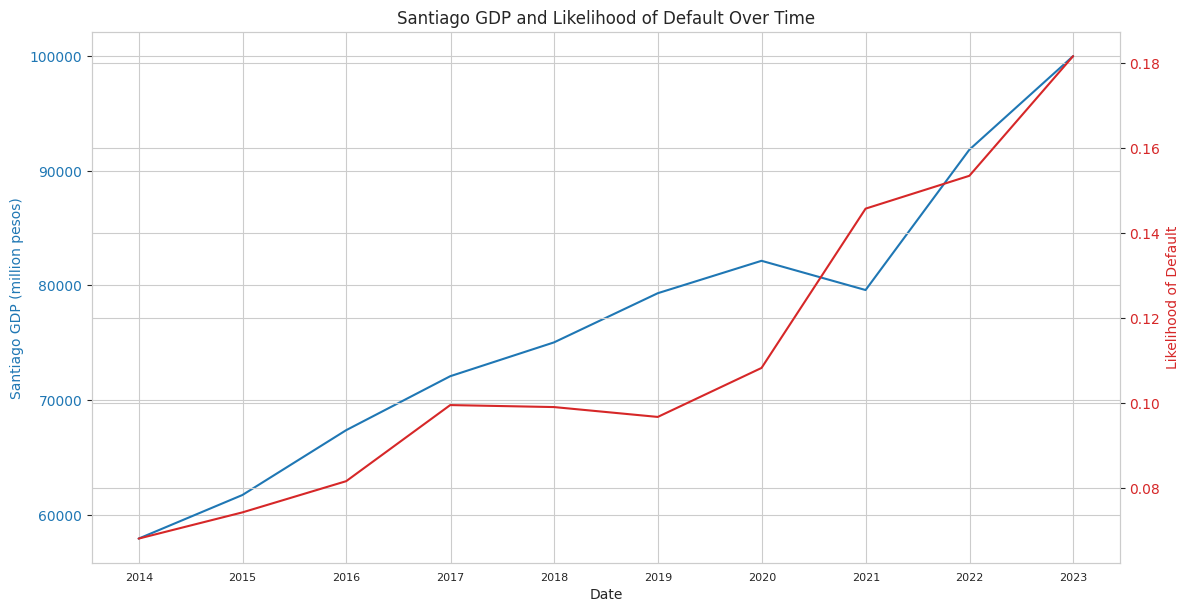

In [ ]:
# Santiago GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_sgdp['DATE'] = pd.to_datetime(df_sgdp['DATE'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Santiago GDP (million pesos)', color=color)
ax1.plot(df_sgdp['DATE'], df_sgdp['GDP(million_pesos)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_sgdp['DATE'], df_sgdp['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Santiago GDP and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_sgdp_corr['GDP(million_pesos)'], df_sgdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_sgdp_corr['GDP(million_pesos)']
X = sm.add_constant(X)  # adding a constant to the model
y = df_sgdp_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
sgdp_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(sgdp_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.865
Model:                             OLS   Adj. R-squared:                  0.848
Method:                  Least Squares   F-statistic:                     51.17
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):           9.68e-05
Time:                         23:35:46   Log-Likelihood:                 29.210
No. Observations:                   10   AIC:                            -54.42
Df Residuals:                        8   BIC:                            -53.81
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(sgdp_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {sgdp_model.params[0]:.3f}")
print(f"Slope (Santiago GDP): {sgdp_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {sgdp_model.pvalues[0]:.3f}")
print(f"P-value (Santiago GDP): {sgdp_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {sgdp_model.bse[0]:.3f}")
print(f"Standard Error (Santiago GDP): {sgdp_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.929942888639459
Model R-squared: 0.865

Model Coefficients:
Intercept: -0.096
Slope (Santiago GDP): 0.000

Model P-values:
P-value (Intercept): 0.011
P-value (Santiago GDP): 0.000

Model Standard Errors:
Standard Error (Intercept): 0.029
Standard Error (Santiago GDP): 0.000


In [10]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_sgdp_corr['GDP_standardized'], df_sgdp_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_sgdp_corr['GDP_standardized']
X = sm.add_constant(X)  # adding a constant to the model
y = df_sgdp_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
sgdp_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(sgdp_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.865
Model:                             OLS   Adj. R-squared:                  0.848
Method:                  Least Squares   F-statistic:                     51.17
Date:                 Tue, 09 Apr 2024   Prob (F-statistic):           9.68e-05
Time:                         09:00:12   Log-Likelihood:                 29.210
No. Observations:                   10   AIC:                            -54.42
Df Residuals:                        8   BIC:                            -53.81
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1108   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Regression Visualization

In [ ]:
sns.set_style("whitegrid")

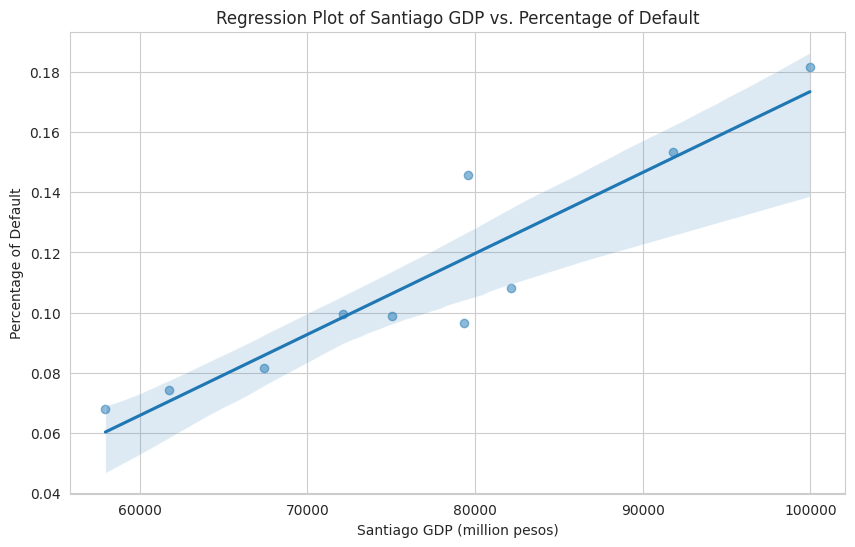

In [ ]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP(million_pesos)', y='LIKELIHOODOFDEFAULT', data=df_sgdp_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Santiago GDP vs. Percentage of Default')
plt.xlabel('Santiago GDP (million pesos)')
plt.ylabel('Percentage of Default')
plt.show()

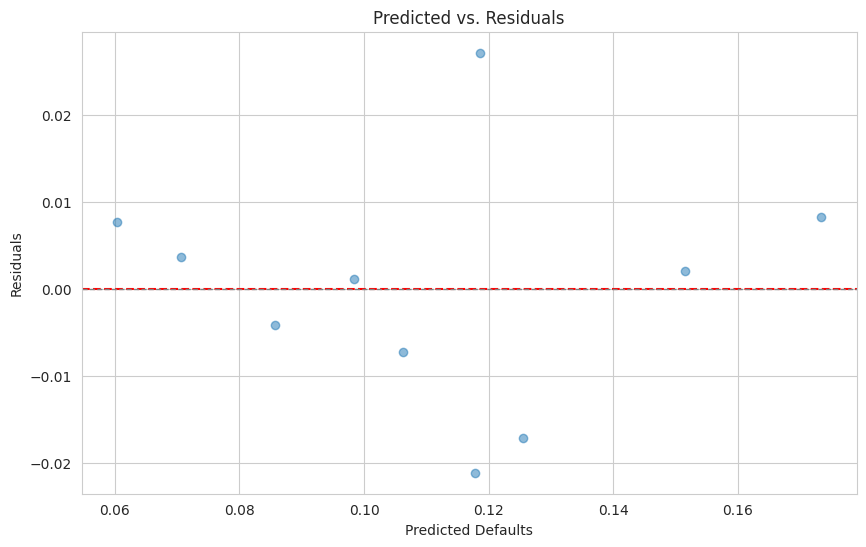

In [ ]:
# Residual Plot
residuals = sgdp_model.resid
predicted = sgdp_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 1000x600 with 0 Axes>

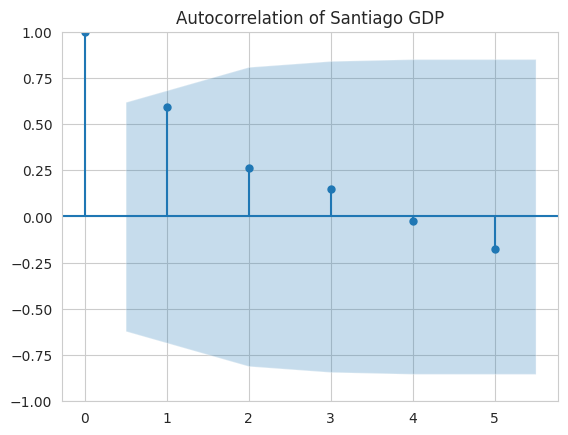

<Figure size 1000x600 with 0 Axes>

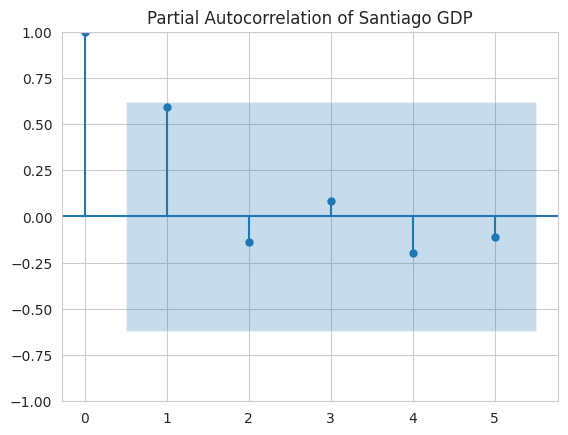

In [ ]:
# Autocorrelation and Partial Autocorrelation
df_sgdp.set_index('DATE', inplace=True)

# Autocorrelation Plot for Santiago GDP
plt.figure(figsize=(10, 6))
plot_acf(df_sgdp['GDP(million_pesos)'], lags=5)
plt.title('Autocorrelation of Santiago GDP')
plt.show()

# Partial Autocorrelation Plot for Santiago GDP
plt.figure(figsize=(10, 6))
plot_pacf(df_sgdp['GDP(million_pesos)'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Santiago GDP')
plt.show()

<Figure size 1000x600 with 0 Axes>

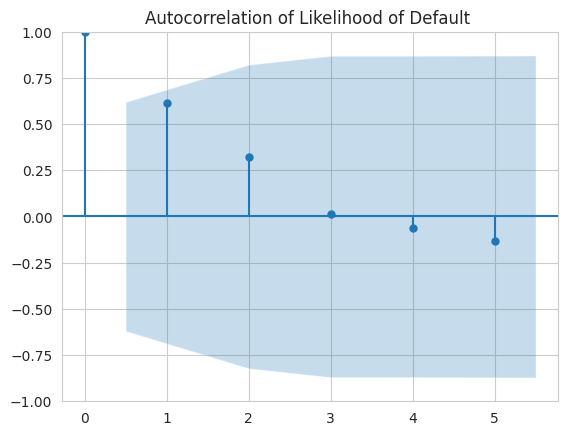

<Figure size 1000x600 with 0 Axes>

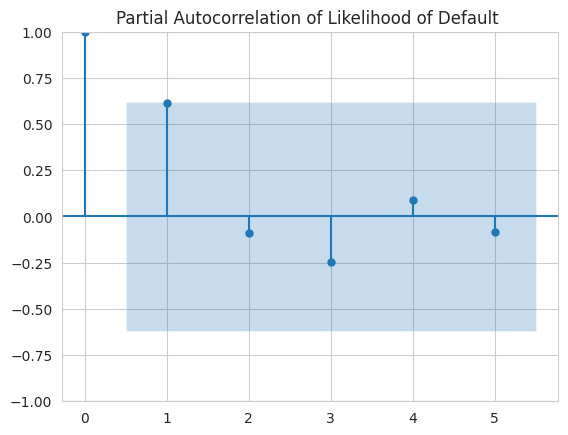

In [ ]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_acf(df_sgdp['LIKELIHOODOFDEFAULT'], lags=5)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_pacf(df_sgdp['LIKELIHOODOFDEFAULT'], lags=5, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()

# Chile Unemployment Rate - yearly

In [ ]:
df_ur = pd.read_csv('unemployment_yearly_agg.csv')
df_ur.head()

,EXTRACTIONDATE,COUNTRY,DATE,YEAR,Rate(percent),LIKELIHOODOFDEFAULT
0,2024-03-22 12:51:02.513,Chile,2006-12-31,2006,8.0,0.032722
1,2024-03-22 12:51:02.513,Chile,2007-12-31,2007,7.0,0.048319
2,2024-03-22 12:51:02.513,Chile,2008-12-31,2008,7.8,0.057514
3,2024-03-22 12:51:02.513,Chile,2009-12-31,2009,11.1,0.065448
4,2024-03-22 12:51:02.513,Chile,2010-12-31,2010,8.3,0.094427


In [ ]:
# check if there is missing value
is_na_present = df_ur.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [ ]:
df_ur.dtypes

EXTRACTIONDATE          object
COUNTRY                 object
DATE                    object
YEAR                     int64
Rate(percent)          float64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [ ]:
# pick only Unemployment Rate and Default Likelihood
df_ur_corr = df_ur[['Rate(percent)', 'LIKELIHOODOFDEFAULT']]
df_ur_corr.head()

,Rate(percent),LIKELIHOODOFDEFAULT
0,8.0,0.032722
1,7.0,0.048319
2,7.8,0.057514
3,11.1,0.065448
4,8.3,0.094427


Basic Visualization

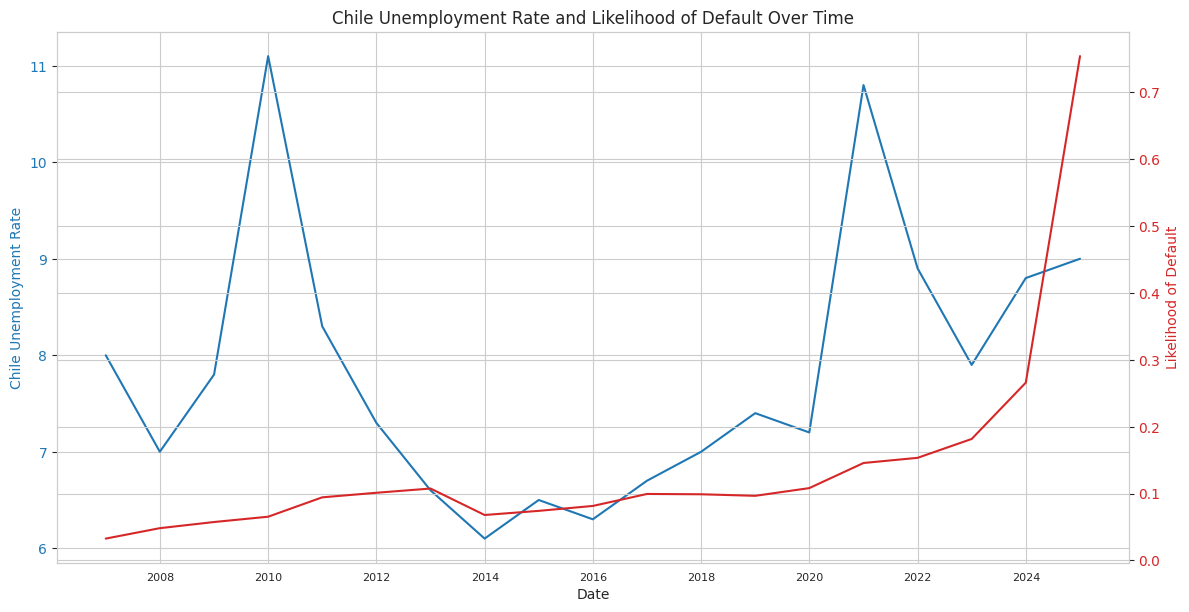

In [ ]:
# Santiago GDP and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_ur['DATE'] = pd.to_datetime(df_ur['DATE'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Chile Unemployment Rate', color=color)
ax1.plot(df_ur['DATE'], df_ur['Rate(percent)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_ur['DATE'], df_ur['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Chile Unemployment Rate and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [ ]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_ur_corr['Rate(percent)'], df_ur_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_ur_corr['Rate(percent)']
X = sm.add_constant(X)  # adding a constant to the model
y = df_ur_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
ur_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(ur_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.083
Model:                             OLS   Adj. R-squared:                  0.029
Method:                  Least Squares   F-statistic:                     1.539
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):              0.232
Time:                         23:35:49   Log-Likelihood:                 9.4003
No. Observations:                   19   AIC:                            -14.80
Df Residuals:                       17   BIC:                            -12.91
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1160      0.208 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(ur_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {ur_model.params[0]:.3f}")
print(f"Slope (Unemployment Rate): {ur_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {ur_model.pvalues[0]:.3f}")
print(f"P-value (Unemployment Rate): {ur_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {ur_model.bse[0]:.3f}")
print(f"Standard Error (Unemployment Rate): {ur_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.28812454116005826
Model R-squared: 0.083

Model Coefficients:
Intercept: -0.116
Slope (Unemployment Rate): 0.033

Model P-values:
P-value (Intercept): 0.585
P-value (Unemployment Rate): 0.232

Model Standard Errors:
Standard Error (Intercept): 0.208
Standard Error (Unemployment Rate): 0.026


Regression Visualization

In [ ]:
sns.set_style("whitegrid")

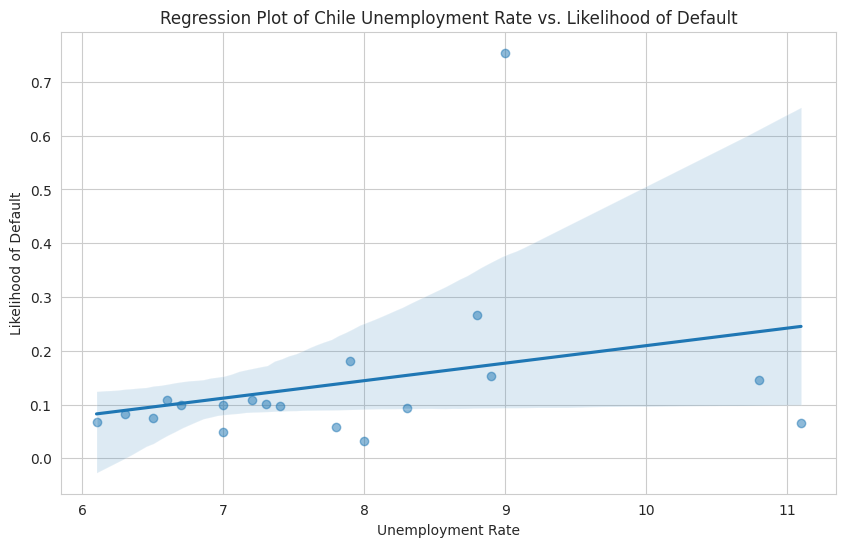

In [ ]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Rate(percent)', y='LIKELIHOODOFDEFAULT', data=df_ur_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Chile Unemployment Rate vs. Likelihood of Default')
plt.xlabel('Unemployment Rate')
plt.ylabel('Likelihood of Default')
plt.show()

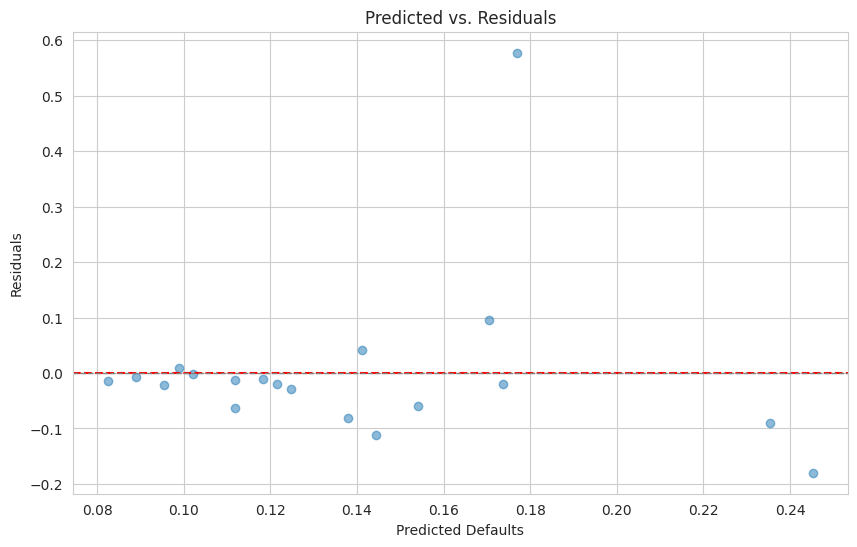

In [ ]:
# Residual Plot
residuals = ur_model.resid
predicted = ur_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 1000x600 with 0 Axes>

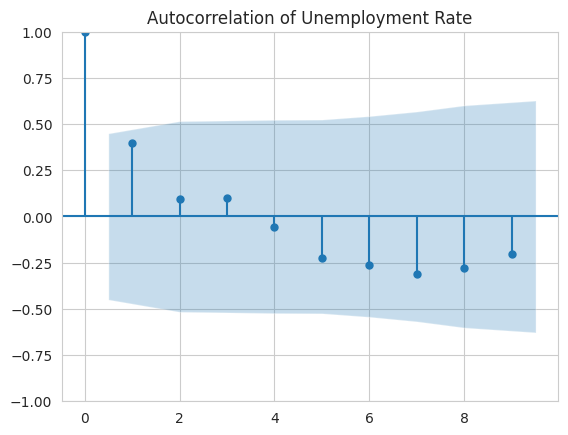

<Figure size 1000x600 with 0 Axes>

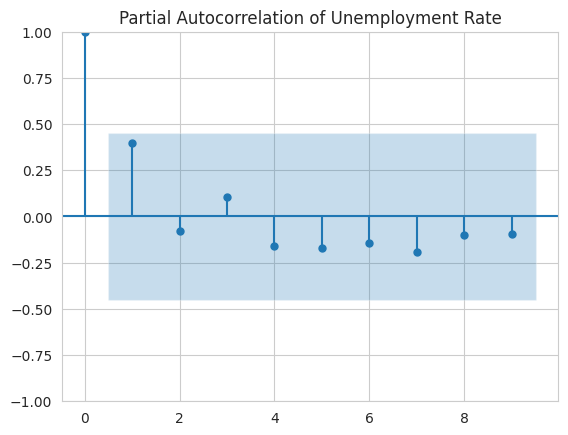

In [ ]:
# Autocorrelation and Partial Autocorrelation
df_ur.set_index('DATE', inplace=True)

# Autocorrelation Plot for Unemployment Rate
plt.figure(figsize=(10, 6))
plot_acf(df_ur['Rate(percent)'], lags=9)
plt.title('Autocorrelation of Unemployment Rate')
plt.show()

# Partial Autocorrelation Plot for Unemployment Rate
plt.figure(figsize=(10, 6))
plot_pacf(df_ur['Rate(percent)'], lags=9, method='ywm')
plt.title('Partial Autocorrelation of Unemployment Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

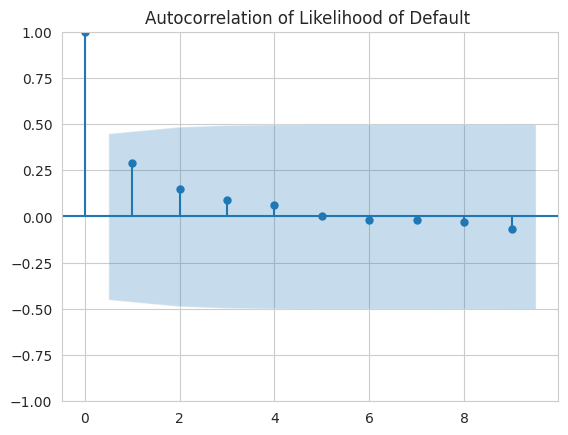

<Figure size 1000x600 with 0 Axes>

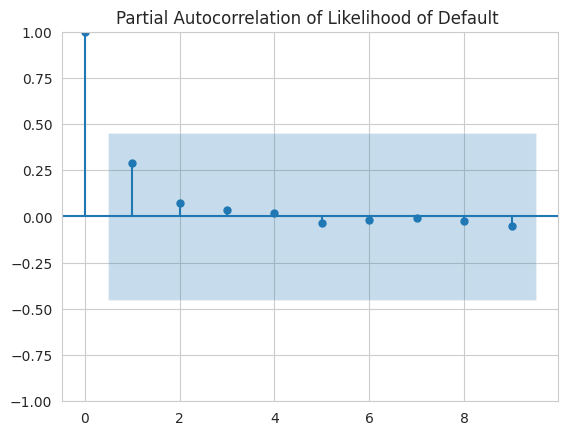

In [ ]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_acf(df_ur['LIKELIHOODOFDEFAULT'], lags=9)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_pacf(df_ur['LIKELIHOODOFDEFAULT'], lags=9, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()